In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Read data

fruits=pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [2]:
fruits.shape

(59, 7)

In [3]:
type(fruits)

pandas.core.frame.DataFrame

In [45]:
print(fruits['fruit_name'].unique())#we have four types of fruits
print("info:")
fruits.info()

['lemon' 'orange' 'apple' 'mandarin']
info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 52 to 38
Data columns (total 7 columns):
fruit_label      47 non-null int64
fruit_name       47 non-null object
fruit_subtype    47 non-null object
mass             47 non-null int64
width            47 non-null float64
height           47 non-null float64
color_score      47 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.9+ KB


In [5]:
fruits['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [6]:
fruits['fruit_subtype'].value_counts()

unknown             10
turkey_navel        10
cripps_pink          6
spanish_belsan       6
selected_seconds     6
braeburn             5
golden_delicious     5
mandarin             5
spanish_jumbo        3
granny_smith         3
Name: fruit_subtype, dtype: int64

In [7]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


<function matplotlib.pyplot.show(*args, **kw)>

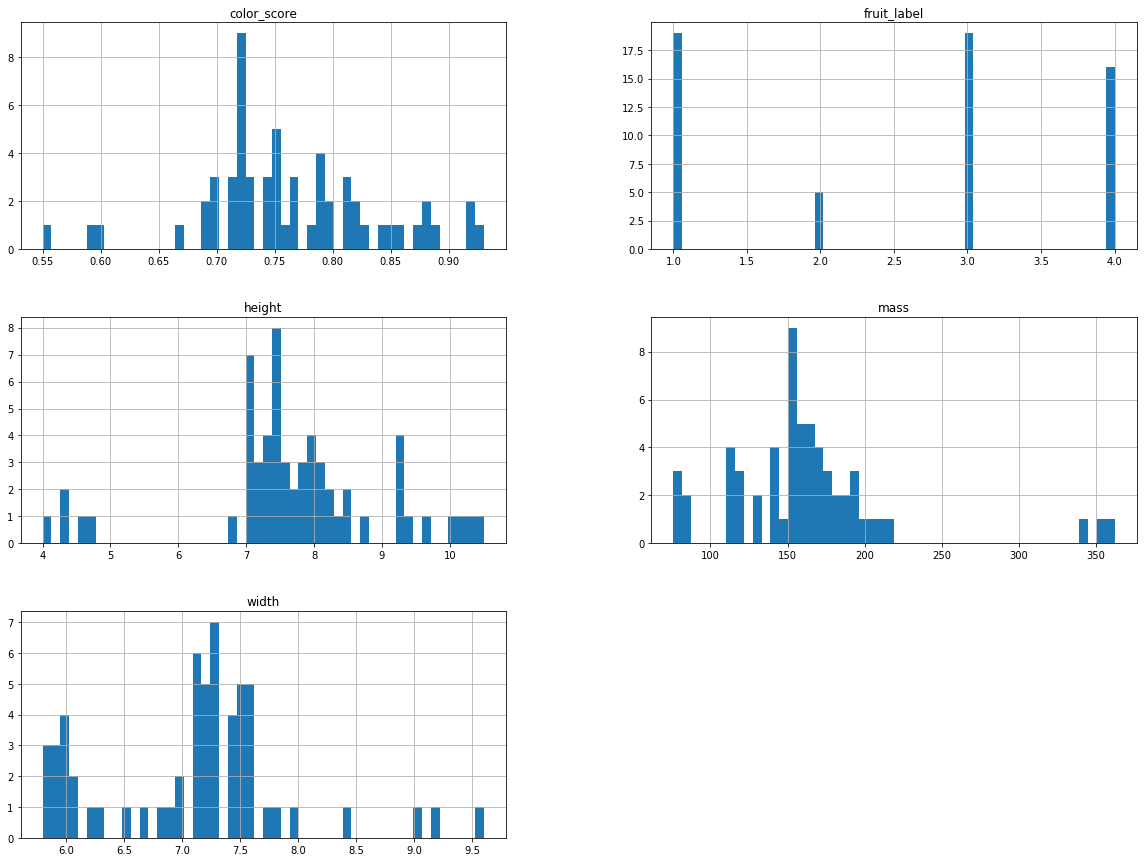

In [8]:
#taking the histogram to know the value range
fruits.hist(bins=50,figsize=(20,15))
plt.show

In [16]:
#Create a test set
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(fruits,test_size=0.2,random_state=42)

In [25]:
train_set.shape
fruits["color_score"].value_counts
#derive an attribute color_grad from color_scores, by multipying by 10
#may be it becomes a dramatic increase, but its ok

fruits["color_grad"]=np.ceil(fruits["color_score"]*10)#ceil to make it as integer
#ceil or other that may be a question

In [28]:
#since stratified_version of train_set is better than random
#do starifiedsplit
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

#stratifying or splitting with the color_score attribute
for train_index,test_index in split.split(fruits,fruits['color_grad']):
    strat_train_set=fruits.loc[train_index]
    strat_test_set=fruits.loc[test_index]
    

In [29]:
strat_train_set.shape

(47, 8)

In [30]:
strat_test_set.shape

(12, 8)

In [31]:
#remove the color_grad attribute

for set_ in (strat_train_set,strat_test_set):
    set_.drop("color_grad",axis=1,inplace=True)

In [33]:
strat_train_set.shape

(47, 7)

In [34]:
#Discover and visualize data
#EXPLORE DATA

#making a copy of set

fruits=strat_train_set.copy()


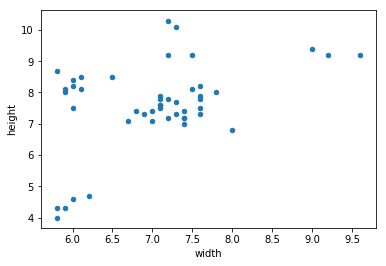

In [36]:
#scatter plot, on width and height
fruits.plot(kind="scatter",x="width",y="height")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 52 to 38
Data columns (total 7 columns):
fruit_label      47 non-null int64
fruit_name       47 non-null object
fruit_subtype    47 non-null object
mass             47 non-null int64
width            47 non-null float64
height           47 non-null float64
color_score      47 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.9+ KB


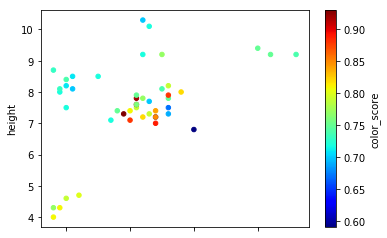

In [42]:
#colored scatter plot, get color of color_score
fruits.plot(kind="scatter",x="width",y="height",c="color_score",cmap=plt.get_cmap("jet"),colorbar=True)
fruits.info()

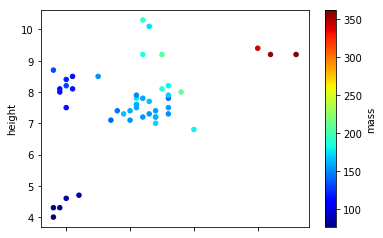

In [39]:
#color map, color for different mass
fruits.plot(kind="scatter",x="width",y="height",c="mass",cmap=plt.get_cmap("jet"),colorbar=True)

In [40]:
#look for correlations
corr_matrix=fruits.corr()

In [41]:
corr_matrix["mass"].sort_values(ascending=False)

mass           1.000000
width          0.905919
height         0.612150
fruit_label    0.006992
color_score   -0.032953
Name: mass, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e52828898>,
      dtype=object)

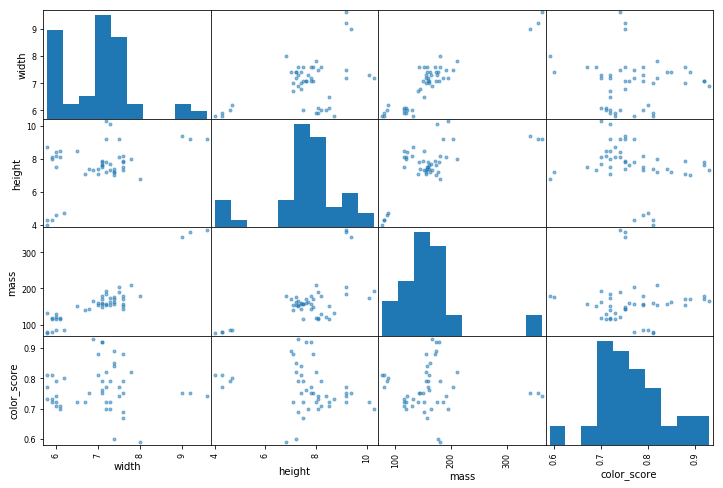

In [43]:
#scatter matrix function used to check for correlation b/w attributes 
#pandas scatter_matrix function

from pandas.tools.plotting import scatter_matrix

attributes=["width","height","mass","color_score"]
scatter_matrix(fruits[attributes],figsize=(12,8))

In [ ]:
#there some linear dependence between width and mass, height and mass....not so proper
#whatever the training set is small
